In [38]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math 

In [39]:
historical = '../data/historical.pickle'

In [40]:
data = pd.read_pickle(historical)
data.head() 

,date,underlying_price,current_index,current_mark,index,mark,current_implied_funding_value,daily_funding_value,current_implied_volatility_value,daily_implied_volatility_value,normalization_factor,oSQTH_price,delta,gamma,vega,volume_osqth,volume_usd
0,2022-02-27 00:00:00,2775.28,7702168.34,8137166.90,7787355.61,8212370.48,0.314,0.304,107.05,105.28,0.828,673.86,0.486,0.000175,0.000249,NaN,NaN
1,2022-02-27 00:05:00,2774.40,7702168.34,8137253.94,7787355.61,8212458.33,0.314,0.304,107.06,105.29,0.828,673.65,0.485,0.000175,0.000249,NaN,NaN
2,2022-02-27 00:10:00,2777.74,7720674.82,8147107.71,7787355.61,8212542.69,0.307,0.304,105.89,105.30,0.828,674.46,0.485,0.000175,0.000246,NaN,NaN
3,2022-02-27 00:15:00,2777.97,7737678.15,8156164.51,7787355.61,8212633.82,0.301,0.304,104.81,105.31,0.828,674.52,0.485,0.000175,0.000244,NaN,NaN
4,2022-02-27 00:20:00,2782.57,7737678.15,8156249.01,7787355.61,8212718.91,0.301,0.304,104.82,105.32,0.828,675.63,0.486,0.000175,0.000244,NaN,NaN


In [41]:
sigma = (data.loc[0,'current_implied_volatility_value']/100)
sigma

1.0705

In [42]:
sigma = sigma*np.sqrt(17.5/365)
sigma

0.2344008940033912

In [43]:
eth = data.loc[0,'underlying_price']
eth

2775.28

In [44]:
eth_squarted = data.loc[0,'current_index']
eth_squarted

7702168.34

In [45]:
df = data[['date','underlying_price','current_index']]
df['eth_squared'] = np.multiply(df['underlying_price'].to_numpy(),df['underlying_price'].to_numpy())
df = df.set_index('date')
df = df[:100]

/var/folders/cm/cp17jm0j4sdc14lby9ns13qc0000gn/T/ipykernel_47966/321142087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eth_squared'] = np.multiply(df['underlying_price'].to_numpy(),df['underlying_price'].to_numpy())


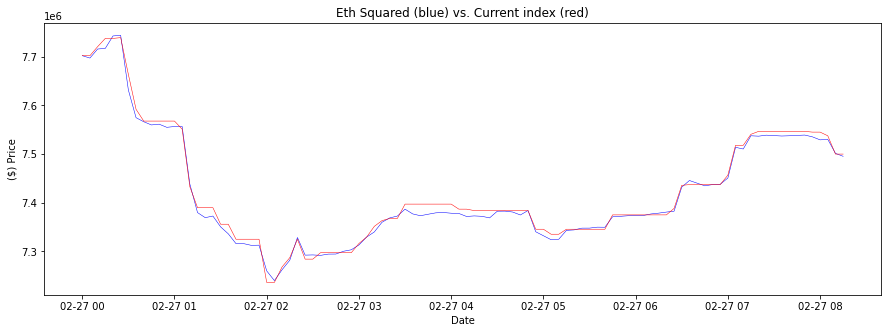

In [46]:
fig, axes = plt.subplots(nrows=1,figsize=(15,5))
axes.set_title('Eth Squared (blue) vs. Current index (red)')
axes.plot(df['eth_squared'],lw=.5, color='blue')
axes.plot(df['current_index'],lw=.5, color='red')
axes.set(xlabel='Date', ylabel='($) Price')
plt.show()